## Эффект новизны и эффект сопративления новому

### Угрозы  ошибки в эксперименте
***Угрозы внутренней достоверности*** - возникают внутри механик проведения теста
* Нарушение правил SUTVA
* Ошибка выжившего
* SRM
* Проблема выборочного/вынужденного воздействия

***Угрозы внешней достоверности*** - возникают при переносе выводов на ГС
* Эффект новизны (novelty effect)
* Эффект сопротивления новому (primacy effect)
* Эффект влияния среды

Но на самом деле ошибок намного больше. Например,
* Влияния подглядывания и непрерывных мониторинг метрик
* Ошибка множественных сравнений
* Парадокс Симпсона
* Эффект обучения
* Долговременный эффект от нововведения
* Неправильное окно конверсии нововведения

***Внешняя достоверность (external validaty)*** 
* характеризует пределы, в которых можно обобщать или ииспользовать зависимости, полученные в ходе эксперимента

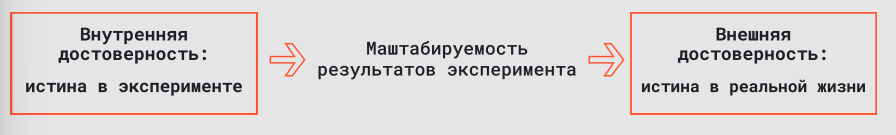

* отражает степень, с которой результаты контролируемого эксперимента могут быть обобщены по таким направлениям, как различные группы населения, разные периоды времени и новые области применения эффекта

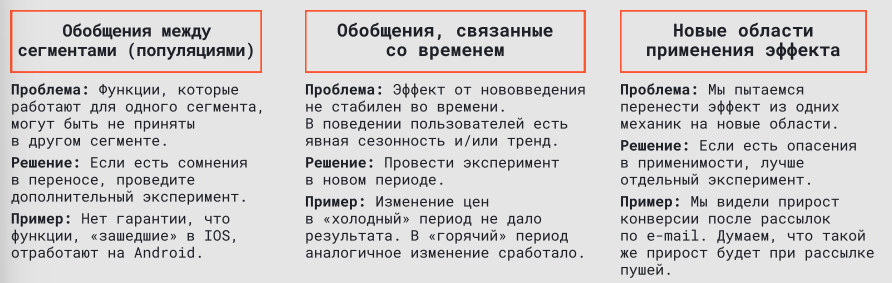

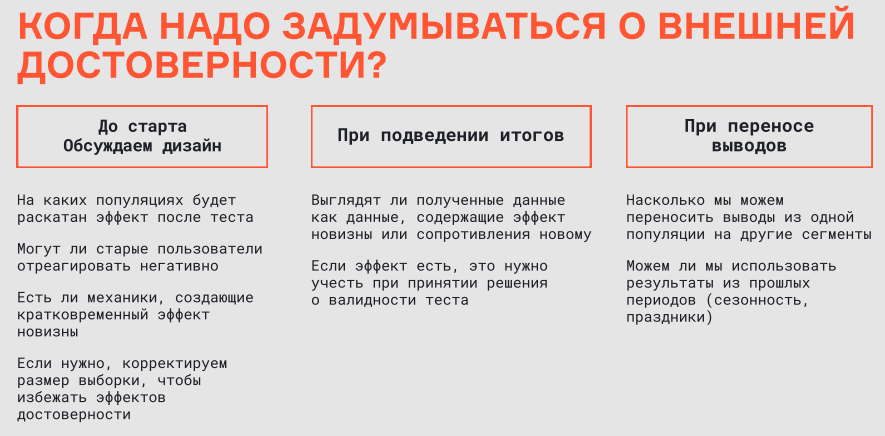

### Эффект сопротивления новому (Primacy effect | Change aversion)
***Суть эффекта:***
* опытным пользователям может потребоваться время для принятия изменений, чтобы отказаться от привычного алгоритма действий
* необходимость переучиваться может привести к неприятию нововведения

***Последствия:*** рост ошибки 2 рода

### Эффект новизны (Novelty effect)
***Суть эффекта:***
* люди с интересом реагируют на новые функции или дизайн в продукте
* новая функция привлекает внимание пользователей, что отражается в увеличении метрик в первые дни
* механики, рассчитанные на кратковременный эффект роста, «партизанские механики», резко повышают метрику, а затем она возвращается к обычному эффекту
* складывается ощущение, что нововведение положительно воспринято пользователями
* если пользователи не увидят в новом функционале пользы, то с течением времени метрики снизятся, что покажет истинное отношение к нововведению

***Последствия:*** увеличение вероятности ошибки 1 рода и переоценка роли нововведения

***Почему важно учитывать эффект сопротивления новому и новизны?***
* для предотвращения переоценивания или недооценивания влияния от нововведения
* для принятия взвешенного решения с точки зрения понимания долгосрочных изменений в ключевых метриках
* для снижения возможной неудовлетворенности пользователей, даже если ключевые метрики растут

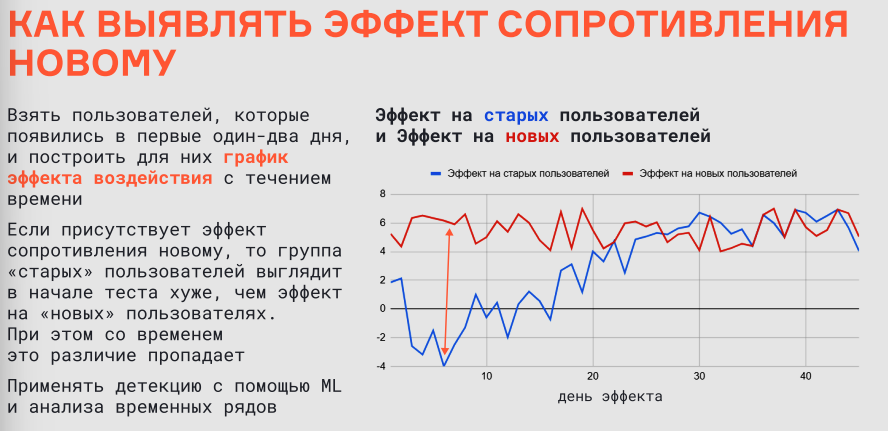

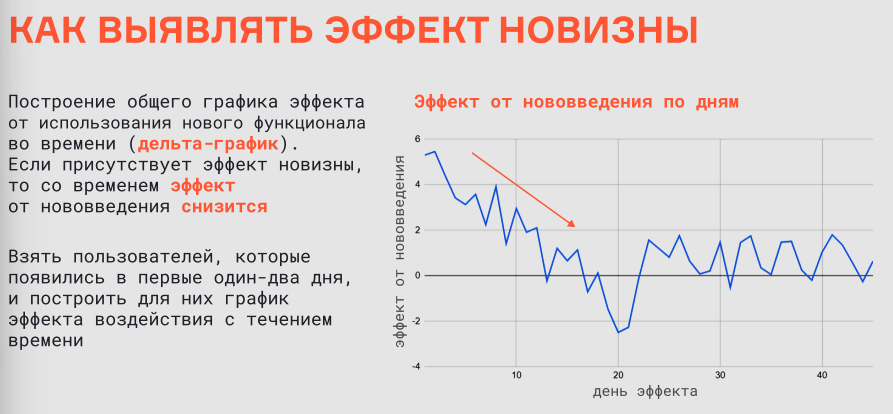

### Как обходить эффект сопротивления новому и эффект новизны
* ***Можно удлинить тест***, чтоб сгладить влияние обоих эффектов, т.к. оба эффекта являются кратковременными (но в некоторых случаях будет не самым разумным подходов), но для этого желательно на исторических данных посмотреть время привыкания к новизне/ уходу сопротивлению
* ***Оставить в тесте только новых пользователей***, которые впервые сталкиваются с продуктом исключив влияние эффектов
* ***Сегментировать эффект от нововведения по различным дням*** или различным пользовательским посещениям, чтоб понять, изменяется ли эффект со временем
* ***Исключить первую неделю*** для стабилизации разницы между метриками эффекта в экспериментальных группах 

***Временные техники:***
* ***Даты проведения эксперимента*** - сравнивая изменения в метриках в разные даты, можно проверить сигналы к присутствию эффекта новизны.
* ***День/неделя с момента первого посещения*** - начиная с первого дня эксперимента,. для каждого пользователя разделите оставшиеся дни на n равных сегментов. Сравните, как изменяются метрики между сегментами от начала эксперимента к концу (в случае если пользователи долго находятся в продукте). Здесь может быть использован парный т-тест
* ***Первая vs. Вторая часть эксперимента*** - для каждого пользователя время в эксперименте разделяется на две части. Проверяется, изменяются ли метрики в каждом интервале.

### Эффект влияния среды
Влияние внешних событий, трендов на результаты эксперимента.
* праздники и погода
* технические неисправности оборудования
* день недели и время суток
* сезонность

***Как снизить эффект влияния среды?***
* Стараться не проводить тесты в период, когда есть риск, что поведение пользователей будет отличаться от обычного
* Обращать внимание на события, происходящие при планировании теста
* Если все-таки тест необходим, при экстраполяции его результатов учитывать это возможное смещение

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Моделирование детекции эффекта сопротивления новому

In [ ]:
df = pd.read_csv('data_for_primacy_task.csv')
df['first_date_in_app'] = pd.to_datetime(df['first_date_in_app'], format='%Y-%m-%d')
df['day_of_test'] = df['first_date_in_app'].rank(method='dense').astype(int)

In [ ]:
df

,first_date_in_app,date_in_app,view_ad_date,user_id,user_status,total_view_ads,crt_to_view_ad,sample_type,day_of_test
0,2023-08-01,2023-08-01,2023-08-01,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,3,1,A1,1
1,2023-08-01,2023-08-02,2023-08-02,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,3,1,A1,1
2,2023-08-01,2023-08-03,NaN,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,0,0,A1,1
3,2023-08-01,2023-08-04,NaN,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,0,0,A1,1
4,2023-08-01,2023-08-05,2023-08-05,AAAXbgPR+ee/xGqljT6kpXs/PaY=,old,1,1,A1,1
...,...,...,...,...,...,...,...,...,...
6209134,2023-08-02,2023-08-20,2023-08-20,7IL0LMVDihGRznnOY9y7u+p2qmk=,old,24,1,A2,2
6209135,2023-08-02,2023-08-22,2023-08-22,7IL0LMVDihGRznnOY9y7u+p2qmk=,old,5,1,A2,2
6209136,2023-08-02,2023-08-02,2023-08-02,7IMZ+JrS/w0hdEJd/H9bE1wmLIc=,new,1,1,A1,2
6209137,2023-08-02,2023-08-03,NaN,7IMZ+JrS/w0hdEJd/H9bE1wmLIc=,new,0,0,A1,2


- Таблица представляет из себя агрегированную таблицу на каждого активного
пользователя в приложении на каждый день.
- Каждый день мы фиксируем была ли конверсия у пользователя в просмотр объявлений и сколько объявлений было просмотренно.
- Также показано, является ли пользователь в этот день новым (user_status), и когда он приходил первый раз (first_date_in_app)
- Также есть день теста (day_of_test)
- На основании этой таблицы мы проиллюстрируем кратковеренные эффекты внешней достоверности

### Добавление эффекта сопротивления новому

Эффект сопротивления новому зададим, используя уравнение гиперболы от дня теста. Он будет характеризовать вероятность того, что эффект присутствует:

In [ ]:
# зададим вероятность эффекта сопротивления в зависимости от дня теста
days = df['day_of_test'].nunique()
day_number = np.arange(1, days + 1)

# параметры уравнения гипреболы
a = 0.5
b = 0.2

# вероятность эффекта сопротивления в зависимости от дня теста (максимальная вероятность сопротивления новому
# для опытных пользователей присутствует в первые дни теста, когда им требуется изменить привычный алгоритм)
probability = a / (day_number + b)

primacy_prob = pd.DataFrame({'day_of_test': day_number, 'probability_effect': probability})

# датасет с вероятностью появления эффекта сопротивления новому
primacy_prob.head()

,day_of_test,probability_effect
0,1,0.416667
1,2,0.227273
2,3,0.156250
3,4,0.119048
4,5,0.096154


In [ ]:
# добавляем вероятность проявления эффекта в зависимости от дня к исходному датасету
df = df.merge(primacy_prob, how = 'left', on = 'day_of_test')
df.head()

,first_date_in_app,date_in_app,view_ad_date,user_id,user_status,total_view_ads,crt_to_view_ad,sample_type,day_of_test,probability_effect
0,2023-08-01,2023-08-01,2023-08-01,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,3,1,A1,1,0.416667
1,2023-08-01,2023-08-02,2023-08-02,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,3,1,A1,1,0.416667
2,2023-08-01,2023-08-03,NaN,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,0,0,A1,1,0.416667
3,2023-08-01,2023-08-04,NaN,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,0,0,A1,1,0.416667
4,2023-08-01,2023-08-05,2023-08-05,AAAXbgPR+ee/xGqljT6kpXs/PaY=,old,1,1,A1,1,0.416667


**Эффект спосротивления новому**

Если присутствует, то распространяется только на тестовую группу и только на опытных пользователей. Он выражается в снижении конверсии в просмотр в соответствии с заданной вероятностью на каждый день теста. Создадим дополнительную колонку в датасете ctr_to_view_ad_effect (новая коверсия с эффектом сопротивления новому). Она будет отражать изменение конверсии в случае, когда есть эффект сопротивления новому, заданный ранее через вероятность его возникновения.

In [ ]:
mask = (df['user_status'] == 'old') & (df['crt_to_view_ad'] == 1) & (df['sample_type'] == 'A2')

df['ctr_to_view_ad_effect'] = np.where(
    mask,
    df['crt_to_view_ad'] - np.random.binomial(1, df['probability_effect'], len(df)), # убираем конверсию с гиперболизированным эффектом
    df['crt_to_view_ad']
)

Группу А2 (изначально без эффекта) для удобства преобразуем в группу B (для случая когда эффект есть)

In [ ]:
df['sample_effect'] = np.where(df['sample_type'] == 'A1', 'A', 'B')

Окончательный датасет приведен ниже:

In [ ]:
df.head()

,first_date_in_app,date_in_app,view_ad_date,user_id,user_status,total_view_ads,crt_to_view_ad,sample_type,day_of_test,probability_effect,ctr_to_view_ad_effect,sample_effect
0,2023-08-01,2023-08-01,2023-08-01,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,3,1,A1,1,0.416667,1,A
1,2023-08-01,2023-08-02,2023-08-02,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,3,1,A1,1,0.416667,1,A
2,2023-08-01,2023-08-03,NaN,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,0,0,A1,1,0.416667,0,A
3,2023-08-01,2023-08-04,NaN,AAAXbgPR+ee/xGqljT6kpXs/PaY=,new,0,0,A1,1,0.416667,0,A
4,2023-08-01,2023-08-05,2023-08-05,AAAXbgPR+ee/xGqljT6kpXs/PaY=,old,1,1,A1,1,0.416667,1,A


### Визуализация изменений в конверсиях

#### Случай отсутствия эффекта сопротивления новому (первичности)

Посмотрим, как изменяются конверсии в просмотр для старых и новых пользователей в исходных данных для групп А1 и А2:

In [ ]:
a1a2 = df.groupby(['day_of_test', 'user_status', 'sample_type']).agg({'crt_to_view_ad':'mean'}).reset_index()

In [ ]:
a1a2

,day_of_test,user_status,sample_type,crt_to_view_ad
0,1,new,A1,0.816241
1,1,new,A2,0.817031
2,1,old,A1,0.838577
3,1,old,A2,0.839073
4,2,new,A1,0.752273
...,...,...,...,...
83,22,new,A2,0.731000
84,23,new,A1,0.705047
85,23,new,A2,0.715874
86,24,new,A1,0.713625


На графике ниже видно, что для групп без эффекта сопротивления новому (A1 и A2) новые и старые пользователи имеют похожую динамику изменения конверсии в просмотр. У новых пользователей она незначительно ниже, но разницы между группами А1 и А2 не наблюдается.  

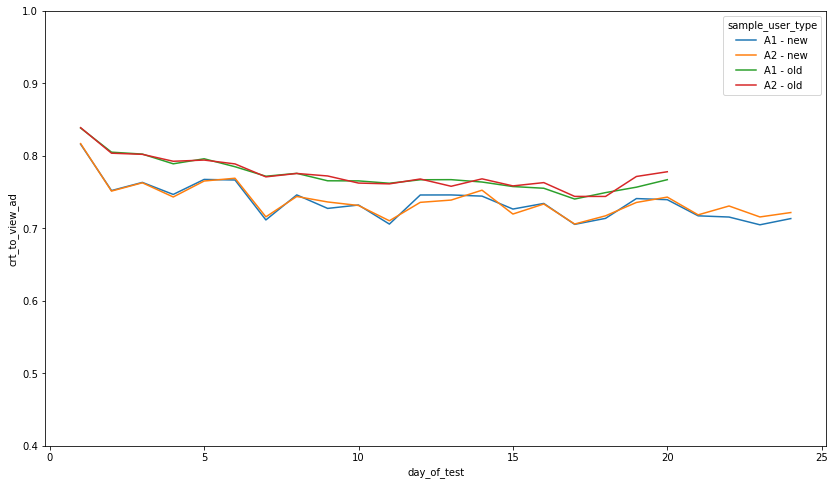

In [ ]:
plt.figure(figsize = (14, 8))
a1a2['sample_user_type'] = a1a2['sample_type'] + ' - ' + a1a2['user_status']
sns.lineplot(data=a1a2, x='day_of_test', y='crt_to_view_ad', hue='sample_user_type')
plt.ylim(0.4, 1)
plt.show()

Это же видно на графике разницы конверсий (дельта-график), который часто используется для иллюстрации эффектов новизны и сопротивления новому.

In [ ]:
crt_no_effect = a1a2.pivot(index='day_of_test', columns='sample_user_type', values='crt_to_view_ad').reset_index()
crt_no_effect['crt_delta_new_pct_no_effect'] = round((crt_no_effect['A2 - new'] / crt_no_effect['A1 - new'] - 1), 3)
crt_no_effect['crt_delta_old_pct_no_effect'] = round((crt_no_effect['A2 - old'] / crt_no_effect['A1 - old'] - 1), 3)
crt_no_effect.head()

sample_user_type,day_of_test,A1 - new,A1 - old,A2 - new,A2 - old,crt_delta_new_pct_no_effect,crt_delta_old_pct_no_effect
0,1,0.816241,0.838577,0.817031,0.839073,0.001,0.001
1,2,0.752273,0.805250,0.751557,0.803826,-0.001,-0.002
2,3,0.763527,0.802604,0.763003,0.802261,-0.001,-0.000
3,4,0.746939,0.789191,0.743409,0.792700,-0.005,0.004
4,5,0.767629,0.796134,0.765440,0.794358,-0.003,-0.002


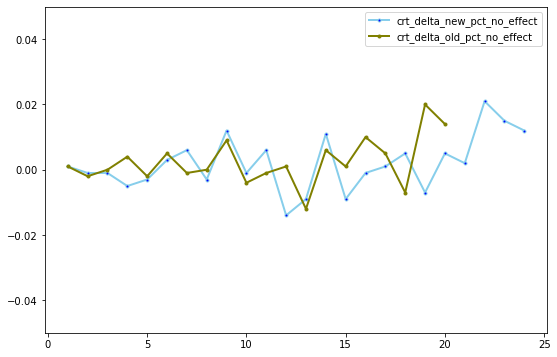

In [ ]:
fig, ax1 = plt.subplots(figsize=(9, 6))

ax1.plot('day_of_test', 'crt_delta_new_pct_no_effect', data=crt_no_effect, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=2)
ax1.plot('day_of_test', 'crt_delta_old_pct_no_effect', data=crt_no_effect, marker='o', markerfacecolor='olive', markersize=3, color='olive', linewidth=2)

plt.ylim(-0.05, 0.05)
plt.legend()
plt.show()

### Случай присутствия эффекта сопротивления новому (добавим эффект сопротивления новому синтетически)

На графике ниже видно, как в случае опытных пользователей в тестовой группе (пользователи видят новую фичу) в первые дни снижается конверсия просмотра объявлений. По мере привыкания к нововведению, конверсия приближается к значениям, характерным для новых пользователей в тестовой группе.

В этой иллюстрации, мы задали этот эффект через вероятность, в реальном тесте он будет присутствовать в похожей манере (если пользователи подвержены этому эффекту).

В случае, если со временем конверсия для старых пользователей не приблизится к новым, то, скорее всего, пользователи не приняли нововведение и релиз придется откатить.

<AxesSubplot:xlabel='day_of_test', ylabel='ctr_to_view_ad_effect'>

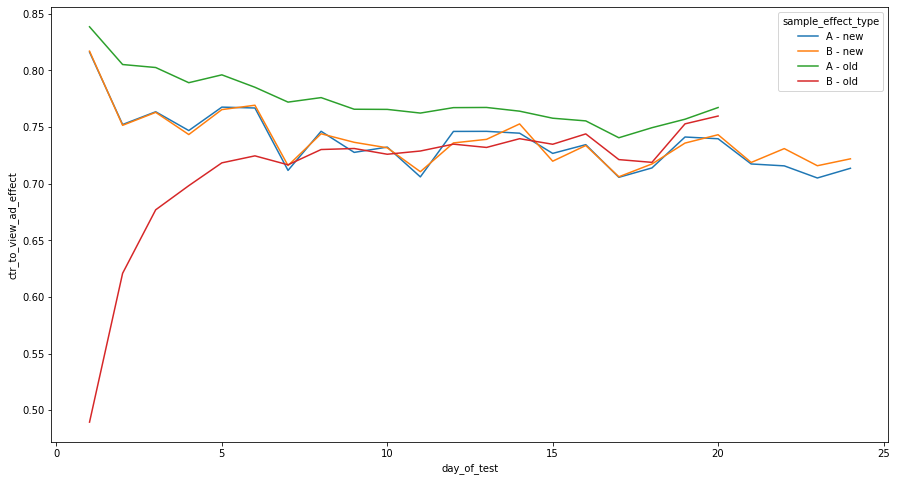

In [ ]:
ab = df.groupby(['day_of_test', 'user_status', 'sample_effect']).agg({'ctr_to_view_ad_effect':'mean'}).reset_index()
ab['sample_effect_type'] = ab['sample_effect'] + ' - ' + ab['user_status']
plt.figure(figsize = (15,8))
sns.lineplot(data=ab, x='day_of_test', y='ctr_to_view_ad_effect', hue='sample_effect_type')

Ниже показан дельта-график для эффекта сопротивления новому. Сравните, как он отличается от случая без эффекта.

In [ ]:
crt_effect = ab.pivot(index='day_of_test', columns='sample_effect_type', values='ctr_to_view_ad_effect').reset_index()
crt_effect['crt_delta_new_pct'] = round((crt_effect['B - new'] / crt_effect['A - new'] - 1), 3)
crt_effect['crt_delta_old_pct'] = round((crt_effect['B - old'] / crt_effect['A - old'] - 1), 3)
crt_effect.head()

sample_effect_type,day_of_test,A - new,A - old,B - new,B - old,crt_delta_new_pct,crt_delta_old_pct
0,1,0.816241,0.838577,0.817031,0.489443,0.001,-0.416
1,2,0.752273,0.805250,0.751557,0.620875,-0.001,-0.229
2,3,0.763527,0.802604,0.763003,0.676956,-0.001,-0.157
3,4,0.746939,0.789191,0.743409,0.698259,-0.005,-0.115
4,5,0.767629,0.796134,0.765440,0.718417,-0.003,-0.098


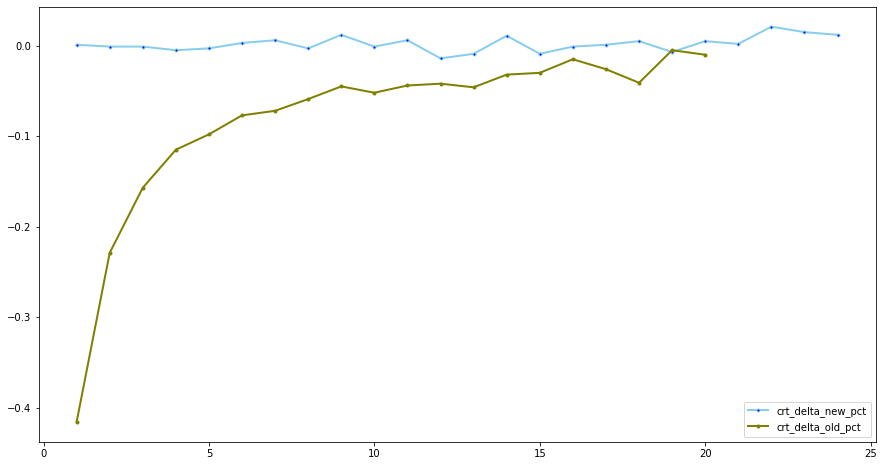

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot('day_of_test', 'crt_delta_new_pct', data=crt_effect, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=2)
ax1.plot('day_of_test', 'crt_delta_old_pct', data=crt_effect, marker='o', markerfacecolor='olive', markersize=3, color='olive', linewidth=2)

plt.legend()
plt.show()

В заключение, хочется отметить, что эффект сопротивления новому наблюдается в случае внедрения серьезных изменений в продукте, которые сильно изменяют привычный пользовательский путь или привычный алгоритм действий. Если такое присутствует, рекомендуется удлинить тест и обязательно сегментировать пользователей на новых и опытных для проверки гипотезы на предмет присутствия эффектов новизны или сопротивления новому.

# Эффект новизны

Обозначения и пояснения:

- ctr_a - конверсия в клик на каждый день для контрольной группы (задается рандомно в интервале от 0 до 0.15)
- ctr_b - конверсия в клик на каждый день для тестовой группы (задается в интервале как и для контрольной группы, но её значение дополнительно изменяется с учетом внедрения эффекта новизны разной интенсивности)
- эффект новизны был задан через уравнение гиперболы и коэффициент k, регулирующий изменение конверсии на каждый день (day_nb) с учетом изменения интенсивности эффекта (в задании рассматривается 3 варианта: k = 1 - нет эффекта, 1.5 - умеренный эффект, 2 - сильный эффект).
- ctr_delta_pct - указывает на % изменения между двумя группами на каждый день
- для определения эффекта новизны используется калибровочное уравнение линейной регресси, полученное в LinkedIn на основе большого числа экспериментов для выявления эффекта новизны. Наклон задается двумя степенными коэффициентами: alpha = 0.35 и gamma = 2. Они определяют степень интенсивности наклона кривой эффекта на каждый день (day_nb)
- отклонение реальных данных от прогнозных из калибровочного уравнения оценивается по значению R2. Чем выше R2, тем точнее наши данные совпадают с формой калибровочного уравнения, которое изначально описывает эффект новизны.
- многократно повторяя эксперимент, смотрим, какая доля экспериментов определяется, как имеющая новизну, с учетом заданной интенсивности и порога R2 (>0.8 - точность фиттинга)

Задаем несколько вариантов эффекта для тестовой группы, через коэффициент k, который влияет на конверсию из просмотра страницы в клик по целевой кнопке.

In [ ]:
# варианты интенсивности эффекта новизны. Относительный эффект
k = [1, 1.1, 1.2]

In [ ]:

def novelty_check_simulation(tests_number, plot = True):

    results = []

    for i in range(tests_number):

          for j in range(len(k)):

                # подготовка синтетических датасетов

                # генерация интервалов дат
                series = pd.date_range(start='2023-06-01', end='2023-06-30', freq='D')
                df = pd.DataFrame(series, columns = ['date'])
                df['day_nb'] = df['date'].dt.day

                # значения конверсий в клик на каждый день для контрольной группы
                df['ctr_a'] = np.random.uniform(0.1, 0.12, size=(len(series)))

                # исходные значения конверсий в клик на каждый день для тестовой группы
                df['ctr_b'] = np.random.uniform(0.1, 0.12, size=(len(series)))

                #effect
                if k[j] == 1:
                    effect = 0
                else:
                    effect = (k[j] * df['ctr_b'] / df['day_nb'])

                # функция добавляющая эффект новизны к конверсии для тестовой группы в зависимости от его интенсивности и времени
                df['ctr_b'] = df['ctr_b'] + effect

                # изменение в конверсии между группами
                df['ctr_delta_pct'] = round(100 * ((df['ctr_b'] - df['ctr_a']) / df['ctr_a']), 3)

                # степенные коэффициенты калибровочного уравнения регрессии
                alpha = 0.35
                gamma = 2

                # параметры экспериментального уравнения
                df['d_1'] = 1 / (df['day_nb']**alpha)
                df['d_2'] = 1 / (df['day_nb']**gamma)

                x = df[['d_1','d_2']].values
                Y = df['ctr_delta_pct'].values

                # использование модели линейной регрессии
                from sklearn.linear_model import LinearRegression
                lin_reg = LinearRegression(fit_intercept = True)
                lin_reg.fit(x, Y)

                # прогноз модели
                df['Y_forecast'] = lin_reg.predict(x)
                Y1 = df['Y_forecast']

                # оценка эффекта новизны
                r2 = r2_score(Y, Y1)

                results.append([i, k[j], r2])

    # построение примера графика
    if plot:
        fig, ax1 = plt.subplots(figsize=(15, 8))

        # задаем вторую ось
        ax2 = ax1.twinx()

        ax1.plot('day_nb', 'ctr_a', data=df, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=2)
        ax1.plot('day_nb', 'ctr_b', data=df, marker='o', markerfacecolor='olive', markersize=3, color='olive', linewidth=2)
        ax2.plot('day_nb', 'ctr_delta_pct', data=df, marker='o', color='red', linewidth=0)
        ax2.plot('day_nb', 'Y_forecast', data=df, marker='', color='red', linewidth=1)

        plt.legend()
        plt.show()

    results = pd.DataFrame(data = results, columns = ['номер теста', 'размер эффекта', 'R2'])
    return results

Задаем количество повторений эксперимента для генерации различных вариантов. На графике - красные точки указывают % разницы в конверсиях между группами на каждый день, сплошная красная линия - калибровочное уравнение с учетом заданных коэффициентов альфа и гамма. Две другие линии - конверсии для контрольной группы (голубая) и тестовая (зеленая). Чем ближе расположение красных точек к линии калибровочного уравнения - тем выше шанс, что эффект будет отнесен к эффекту новизны. Важно учитывать монотонность изменений конверсий. Монотонное снижение % разницы в конверсиях заложено в калибровочное уравнение. Немонотонное изменение реальных данных приведет к ухудшению описания реальных данных калибровочным уравнением и понизит R2, хотя эффект новизны, возможно, и будет присутствовать.

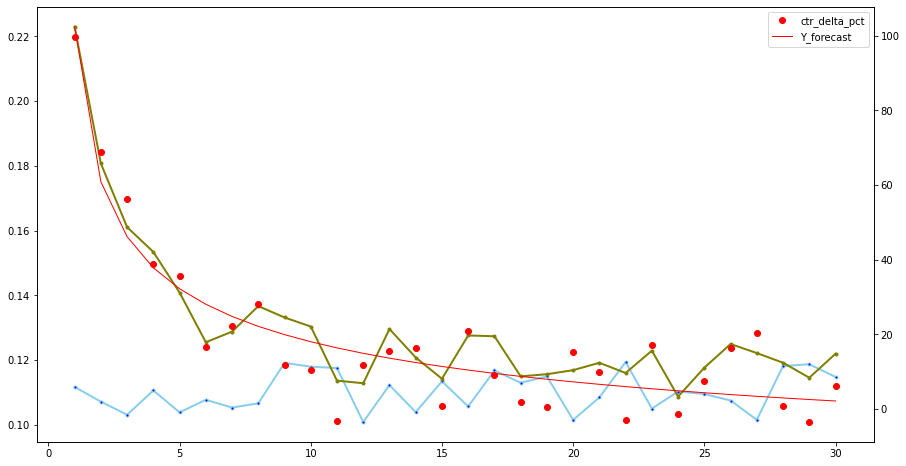

In [ ]:
df_stat = novelty_check_simulation(1000, plot = True)

In [ ]:
# результаты симуляций выглядят так
df_stat.head(9)

,номер теста,размер эффекта,R2
0,0,1.0,0.217864
1,0,1.1,0.848422
2,0,1.2,0.898315
3,1,1.0,0.062866
4,1,1.1,0.859992
5,1,1.2,0.884170
6,2,1.0,0.031697
7,2,1.1,0.847785
8,2,1.2,0.810686


Здесь из 1000 экспериментов с k = 1 (изначально не задан эффект новизны) он был **ошибочно** определен в 19 случаях. При k = 2 (эффект ярко выражен) он был **правильно** определен в 464 случаях. Изменяя точность R2 и характерных калибровочных коэффициентов, можно попытаться повысить мощность и лучше распознать эффект новизны.    

In [ ]:
# монотонность изменений НЕ принимается во внимание
df_stat.query('R2 >= 0.8').groupby('размер эффекта').agg({'номер теста':'count'})

,номер теста
размер эффекта,
1.1,930
1.2,983


In [ ]:
# монотонность изменений НЕ принимается во внимание
df_stat.query('R2 >= 0.7').groupby('размер эффекта').agg({'номер теста':'count'})

,номер теста
размер эффекта,
1.0,148
1.5,542
2.0,861
5.0,1000
